In [1]:
import os
import joblib
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils_visualize import plot_calibration_curves

In [2]:
artifacts_fpath='/local-scratch/nigam/projects/lguo/temp_ds_shift_robustness/experiments/dg/artifacts'
baseline_artifacts_fpath='/local-scratch/nigam/projects/lguo/temp_ds_shift_robustness/experiments/baseline/artifacts'

In [3]:
algos = {
    'erm':'ERM',
    'irm':'IRM',
    'dro':'GroupDRO',
    'coral':'CORAL', 
    'adversarial':'AL',
}
tasks = {
    'hospital_mortality':'In-Hospital Mortality',
    'LOS_7':'LOS > 7 Days',
    'readmission_30':'Readmission in 30 Days',
    'icu_admission':'Admission to ICU'
}
train_years = {
    '2009_2010_2011_2012':'09-12',
    '2010_2011_2012_2013':'10-13',
    '2011_2012_2013_2014':'11-14',
    '2012_2013_2014_2015':'12-15',
    '2013_2014_2015_2016':'13-16',
    '2014_2015_2016_2017':'14-17',
    '2015_2016_2017_2018':'15-18',
    '2009_2010_2011_2012_2013':'09-13',
    '2009_2010_2011_2012_2013_2014':'09-14',
    '2009_2010_2011_2012_2013_2014_2015':'09-15',
    '2009_2010_2011_2012_2013_2014_2015_2016':'09-16',
    '2009_2010_2011_2012_2013_2014_2015_2016_2017':'09-17',
    '2009_2010_2011_2012_2013_2014_2015_2016_2017_2018':'09-18',
}

ax_lims = {
    'hospital_mortality':[0, 0.25],
    'LOS_7':[0, 0.75],
    'readmission_30':[0, 0.4],
    'icu_admission':[0, 0.55]
}

#### Summary:
- CORAL improves OOD calibration for ICU admission predictions for which OOD performance was most impacted by temporal dataset shift, but the improvement is only observed when training models on the oldest year group (09-12) and not on more recent or diverse data. 


09-12 model calibration curves


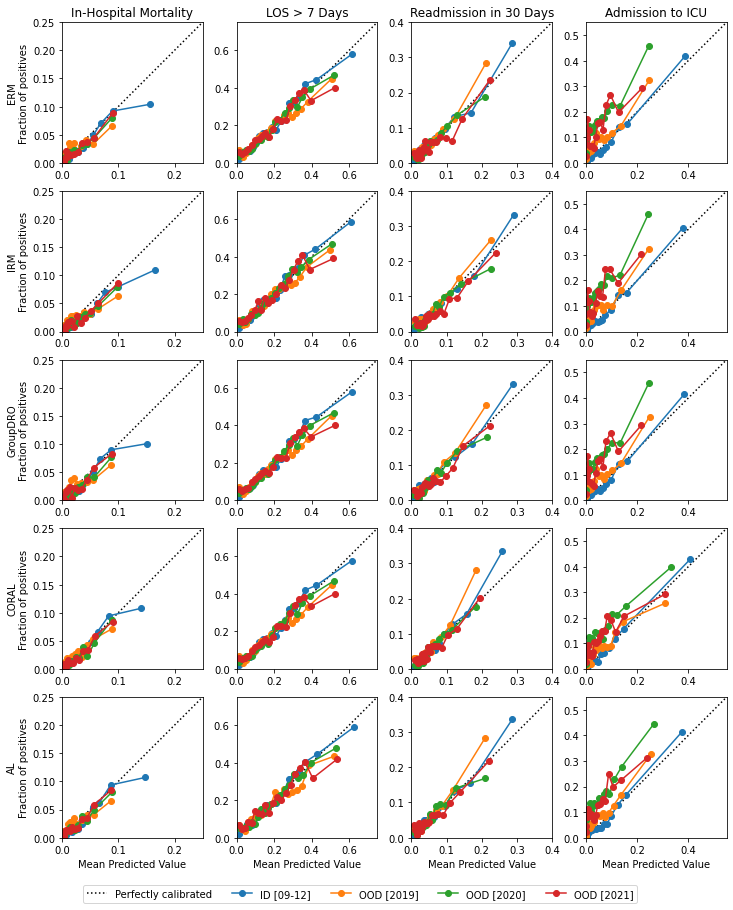

10-13 model calibration curves


<Figure size 432x288 with 0 Axes>

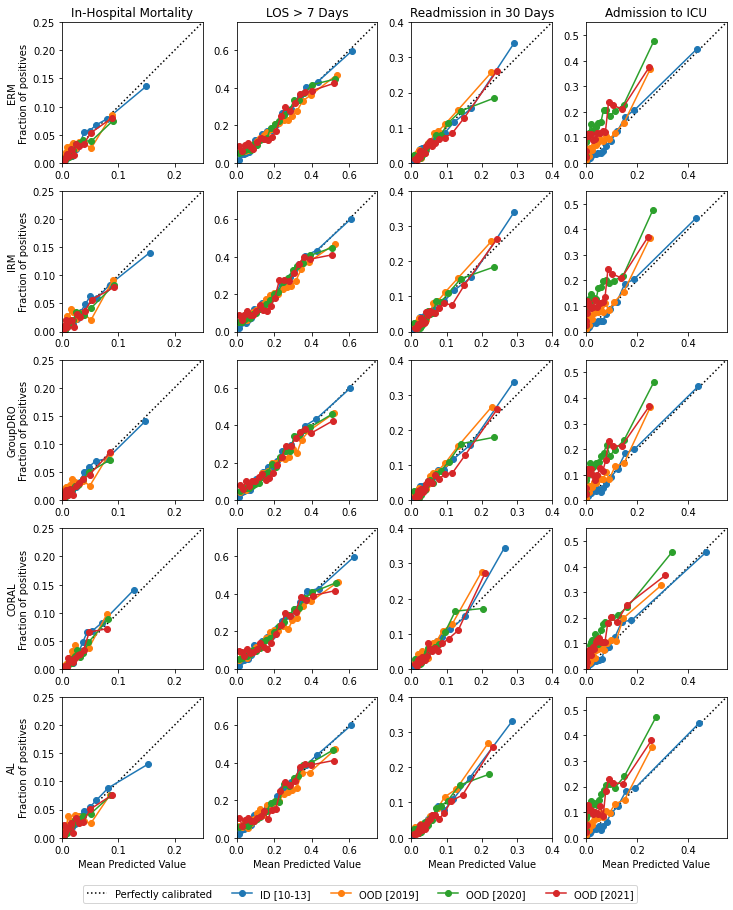

11-14 model calibration curves


<Figure size 432x288 with 0 Axes>

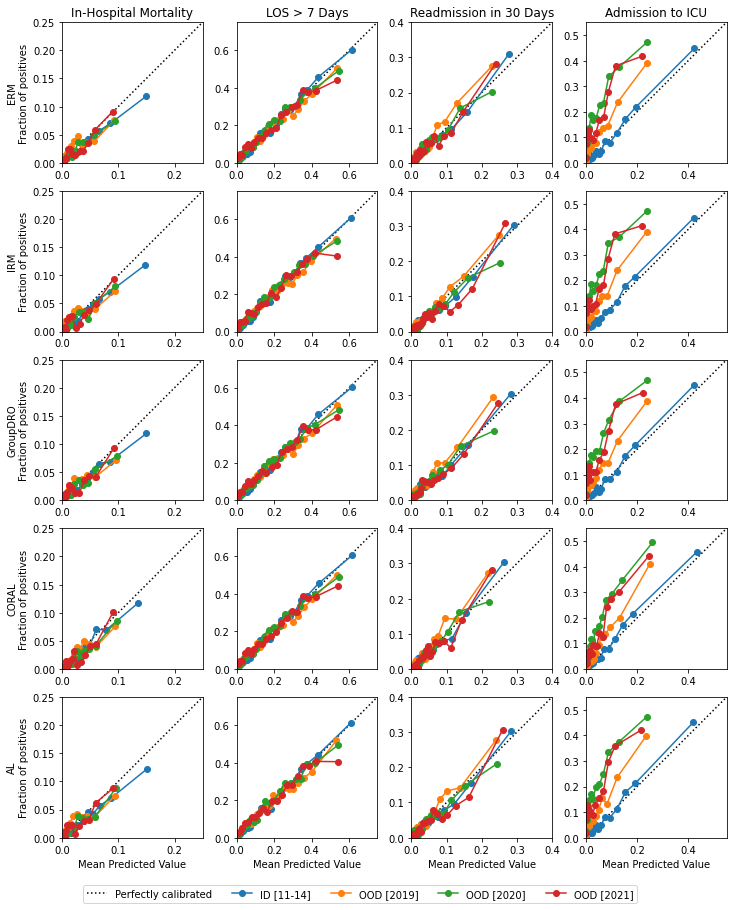

12-15 model calibration curves


<Figure size 432x288 with 0 Axes>

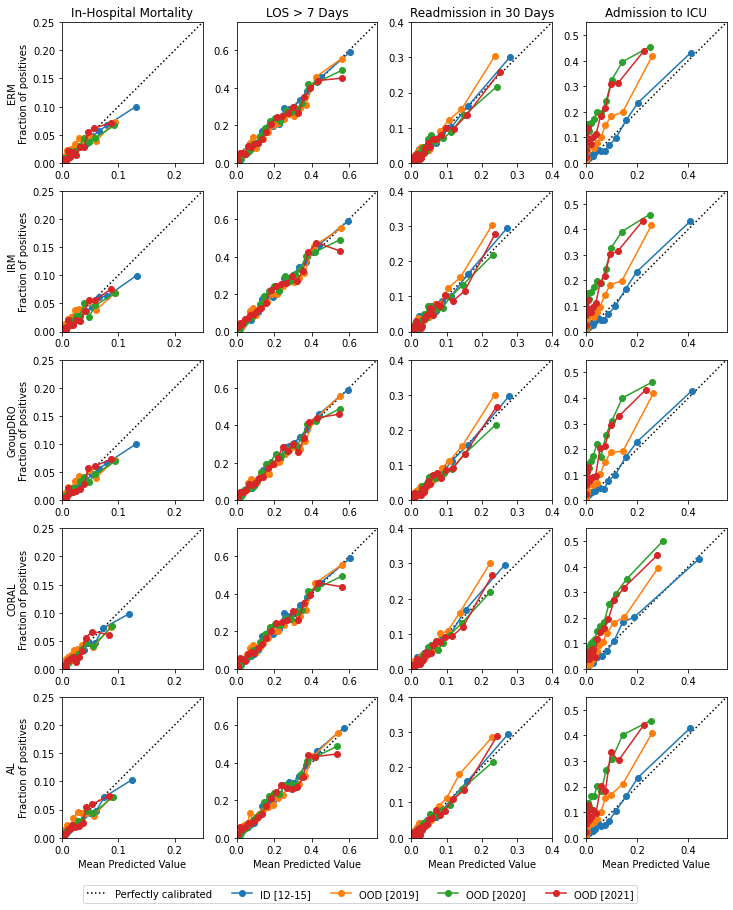

13-16 model calibration curves


<Figure size 432x288 with 0 Axes>

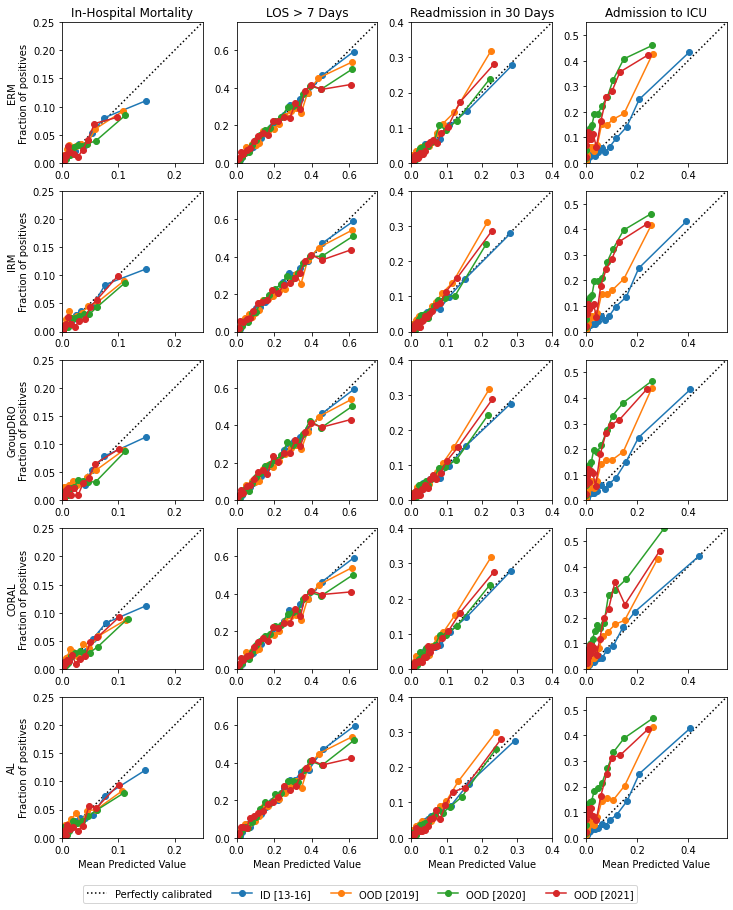

14-17 model calibration curves


<Figure size 432x288 with 0 Axes>

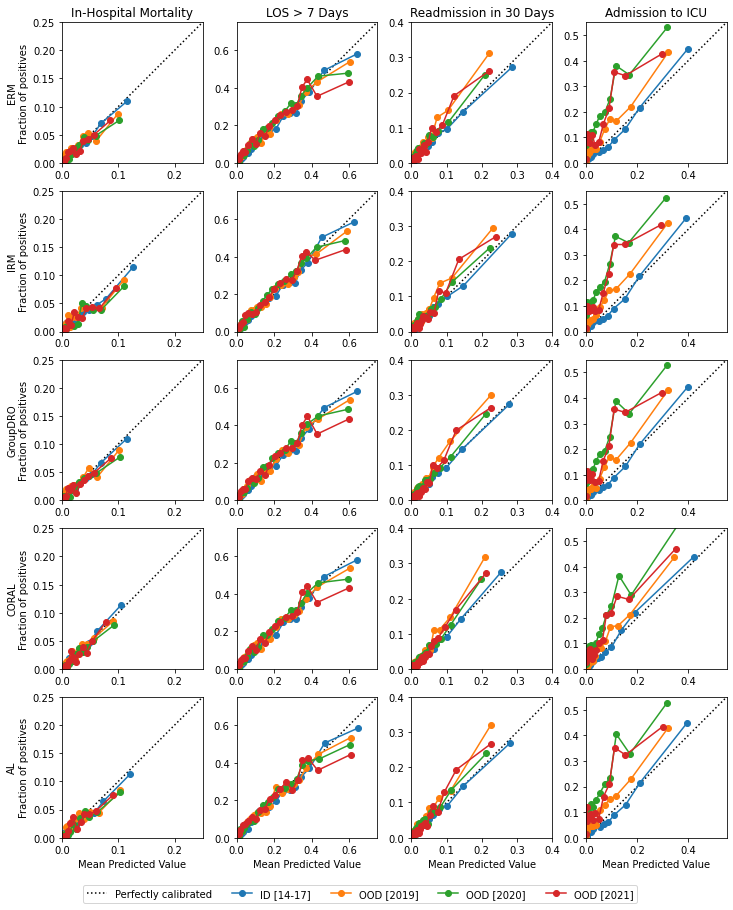

15-18 model calibration curves


<Figure size 432x288 with 0 Axes>

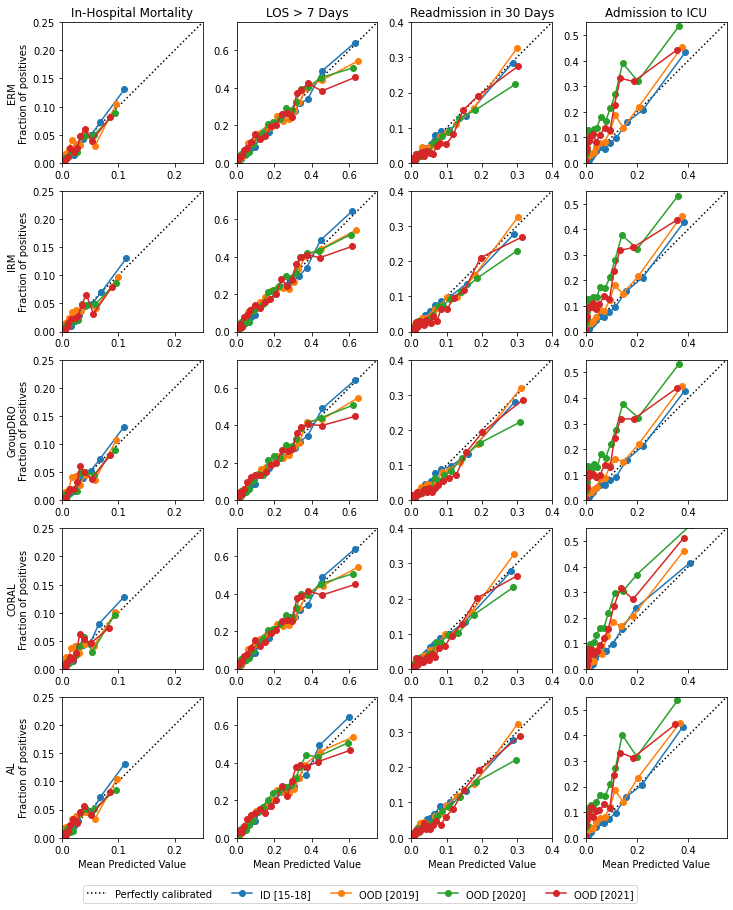

09-13 model calibration curves


<Figure size 432x288 with 0 Axes>

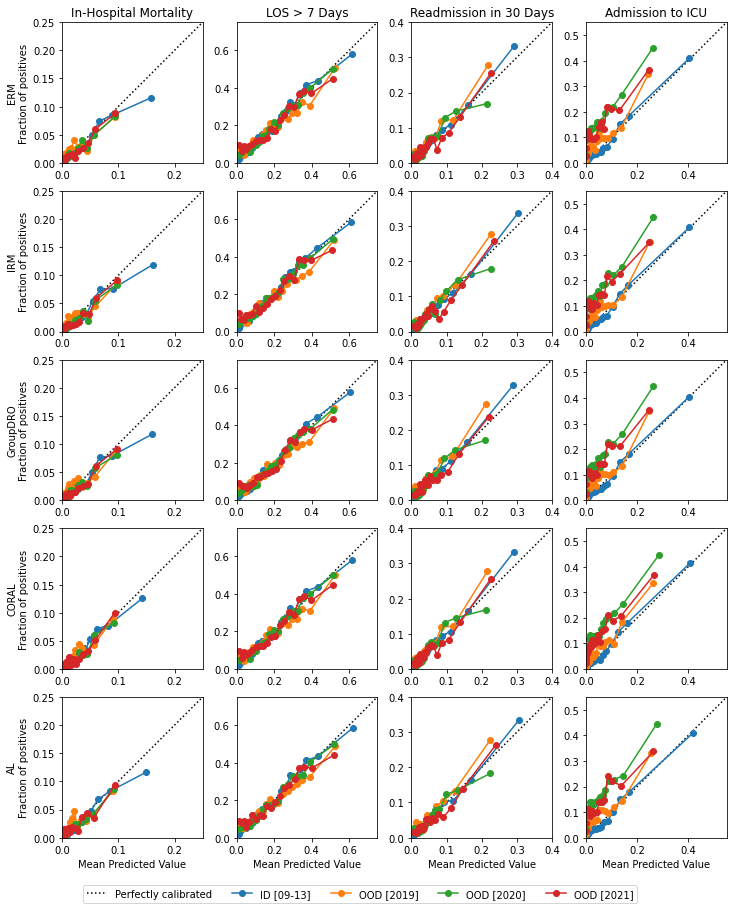

09-14 model calibration curves


<Figure size 432x288 with 0 Axes>

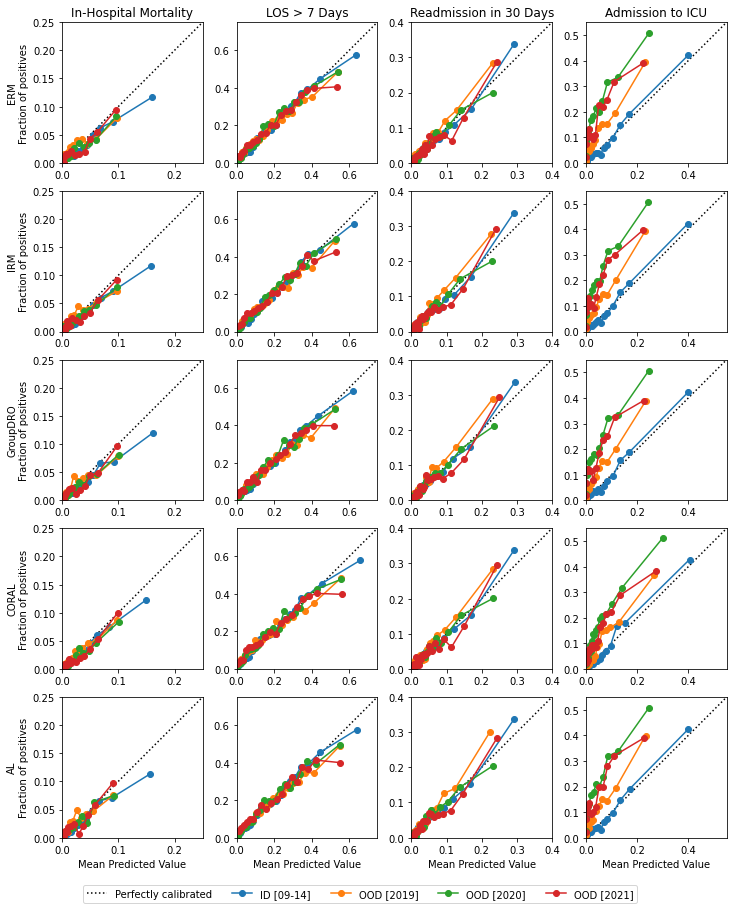

09-15 model calibration curves


<Figure size 432x288 with 0 Axes>

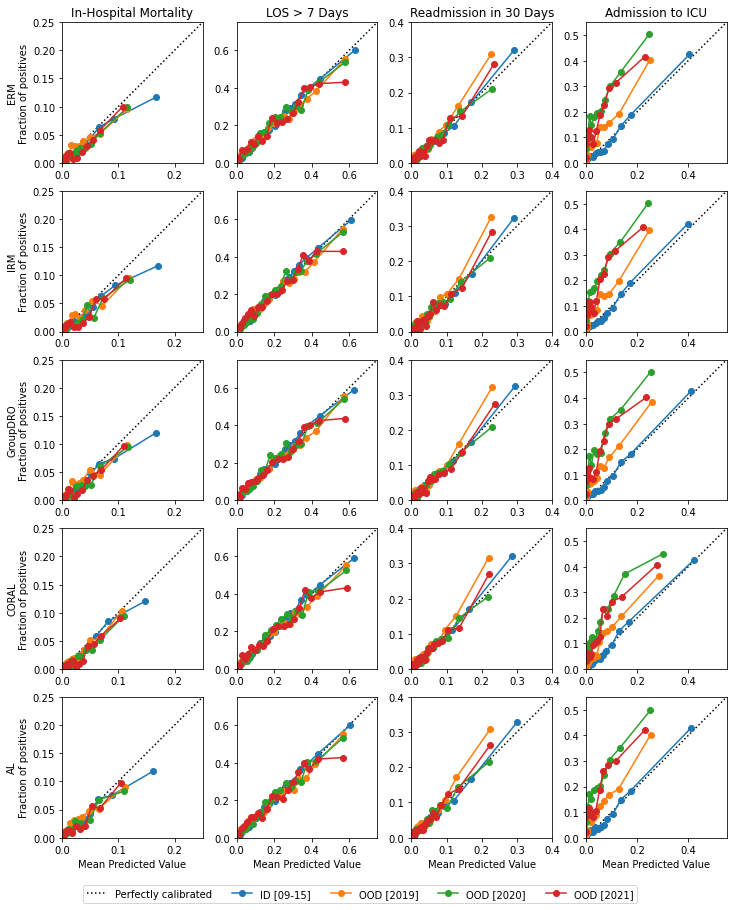

09-16 model calibration curves


<Figure size 432x288 with 0 Axes>

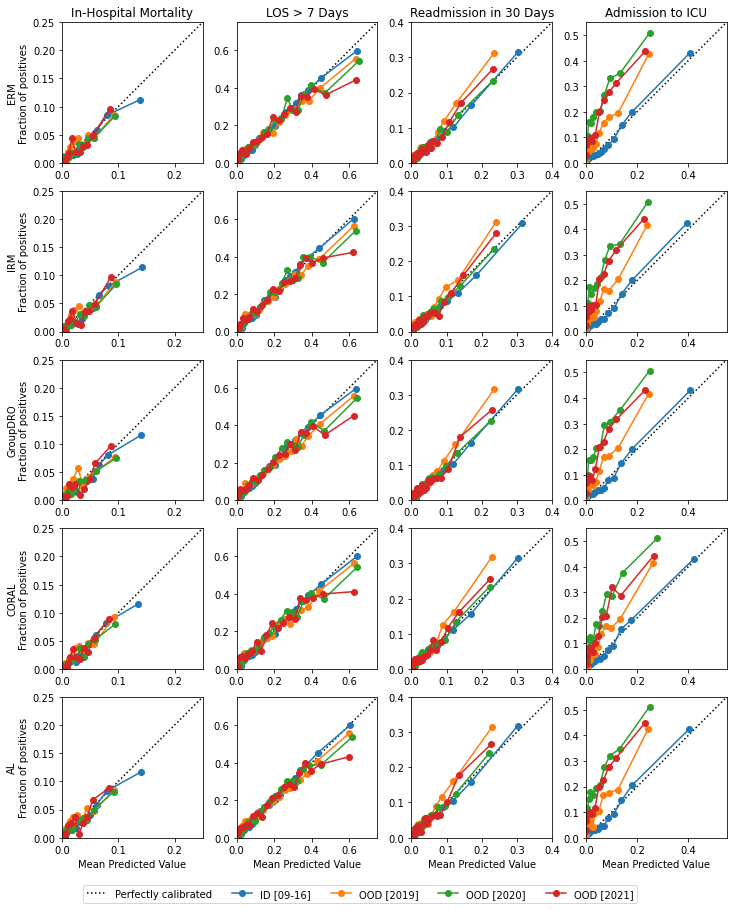

09-17 model calibration curves


<Figure size 432x288 with 0 Axes>

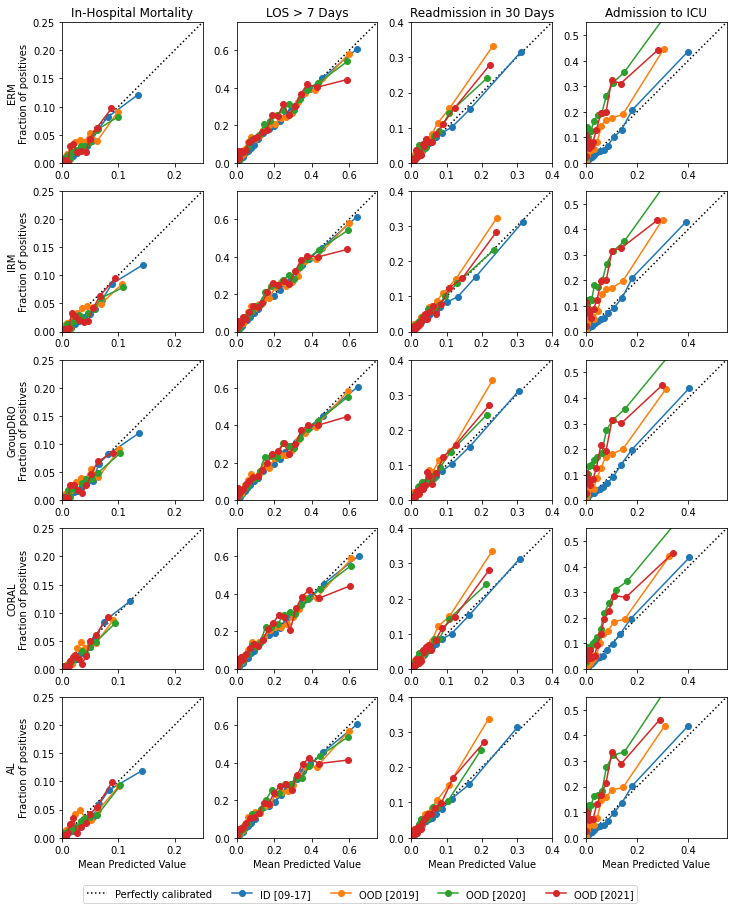

09-18 model calibration curves


<Figure size 432x288 with 0 Axes>

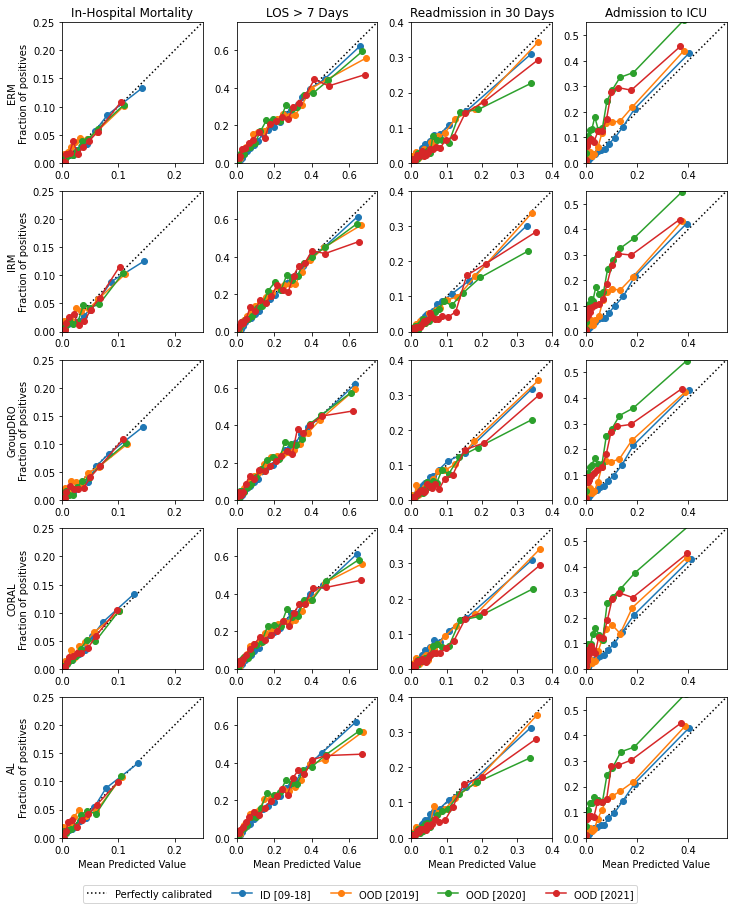

<Figure size 432x288 with 0 Axes>

In [5]:
for year in train_years:
    print(f'{train_years[year]} model calibration curves')
    
    plot_calibration_curves(
        tasks=tasks,
        algos=algos,
        id_group=year,
        id_group_label=train_years[year],
        ax_lims=ax_lims
    )